In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('연령층별_시간대별_사상자.csv', encoding='cp949')


In [2]:
df = df.rename(columns={'연령층별(1)':'연령층별', '시간대별(1)':'시간대별', '월별(1)':'월별', '2021':'사망자수', '2021.1':'부상자수'})
df = df.iloc[1:]
df

,연령층별,시간대별,월별,사망자수,부상자수
1,12세이하,00시-02시,전체,0,86
2,12세이하,00시-02시,1월,0,3
3,12세이하,00시-02시,2월,0,14
4,12세이하,00시-02시,3월,0,9
5,12세이하,00시-02시,4월,0,5
...,...,...,...,...,...
1554,불명,22시-24시,8월,0,2
1555,불명,22시-24시,9월,0,1
1556,불명,22시-24시,10월,0,0
1557,불명,22시-24시,11월,0,0


In [3]:
df = df.reset_index(drop=True)
df

,연령층별,시간대별,월별,사망자수,부상자수
0,12세이하,00시-02시,전체,0,86
1,12세이하,00시-02시,1월,0,3
2,12세이하,00시-02시,2월,0,14
3,12세이하,00시-02시,3월,0,9
4,12세이하,00시-02시,4월,0,5
...,...,...,...,...,...
1553,불명,22시-24시,8월,0,2
1554,불명,22시-24시,9월,0,1
1555,불명,22시-24시,10월,0,0
1556,불명,22시-24시,11월,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령층별    1558 non-null   object
 1   시간대별    1558 non-null   object
 2   월별      1558 non-null   object
 3   사망자수    1558 non-null   object
 4   부상자수    1558 non-null   object
dtypes: object(5)
memory usage: 61.0+ KB


In [5]:
df['사망자수'] = df['사망자수'].astype('int64')
df['부상자수'] = df['부상자수'].astype('int64')
df = df[df['연령층별'] != '불명']
df

,연령층별,시간대별,월별,사망자수,부상자수
0,12세이하,00시-02시,전체,0,86
1,12세이하,00시-02시,1월,0,3
2,12세이하,00시-02시,2월,0,14
3,12세이하,00시-02시,3월,0,9
4,12세이하,00시-02시,4월,0,5
...,...,...,...,...,...
1397,71세이상,22시-24시,8월,1,26
1398,71세이상,22시-24시,9월,2,22
1399,71세이상,22시-24시,10월,3,33
1400,71세이상,22시-24시,11월,2,26


In [6]:
df_group = df.groupby(['연령층별','시간대별']).sum()

In [7]:
df_group

사망자수  부상자수
연령층별  시간대별               
12세이하 00시-02시     0   172
      02시-04시     0    66
      04시-06시     0    54
      06시-08시     2   220
      08시-10시     4  1926
...             ...   ...
71세이상 14시-16시   216  6262
      16시-18시   204  5620
      18시-20시   222  3692
      20시-22시    94  1334
      22시-24시    42   576

[108 rows x 2 columns]

In [8]:
df_age = df['연령층별'].unique()

In [9]:
df_time = df['시간대별'].unique()
df_time

array(['00시-02시', '02시-04시', '04시-06시', '06시-08시', '08시-10시', '10시-12시',
       '12시-14시', '14시-16시', '16시-18시', '18시-20시', '20시-22시', '22시-24시'],
      dtype=object)

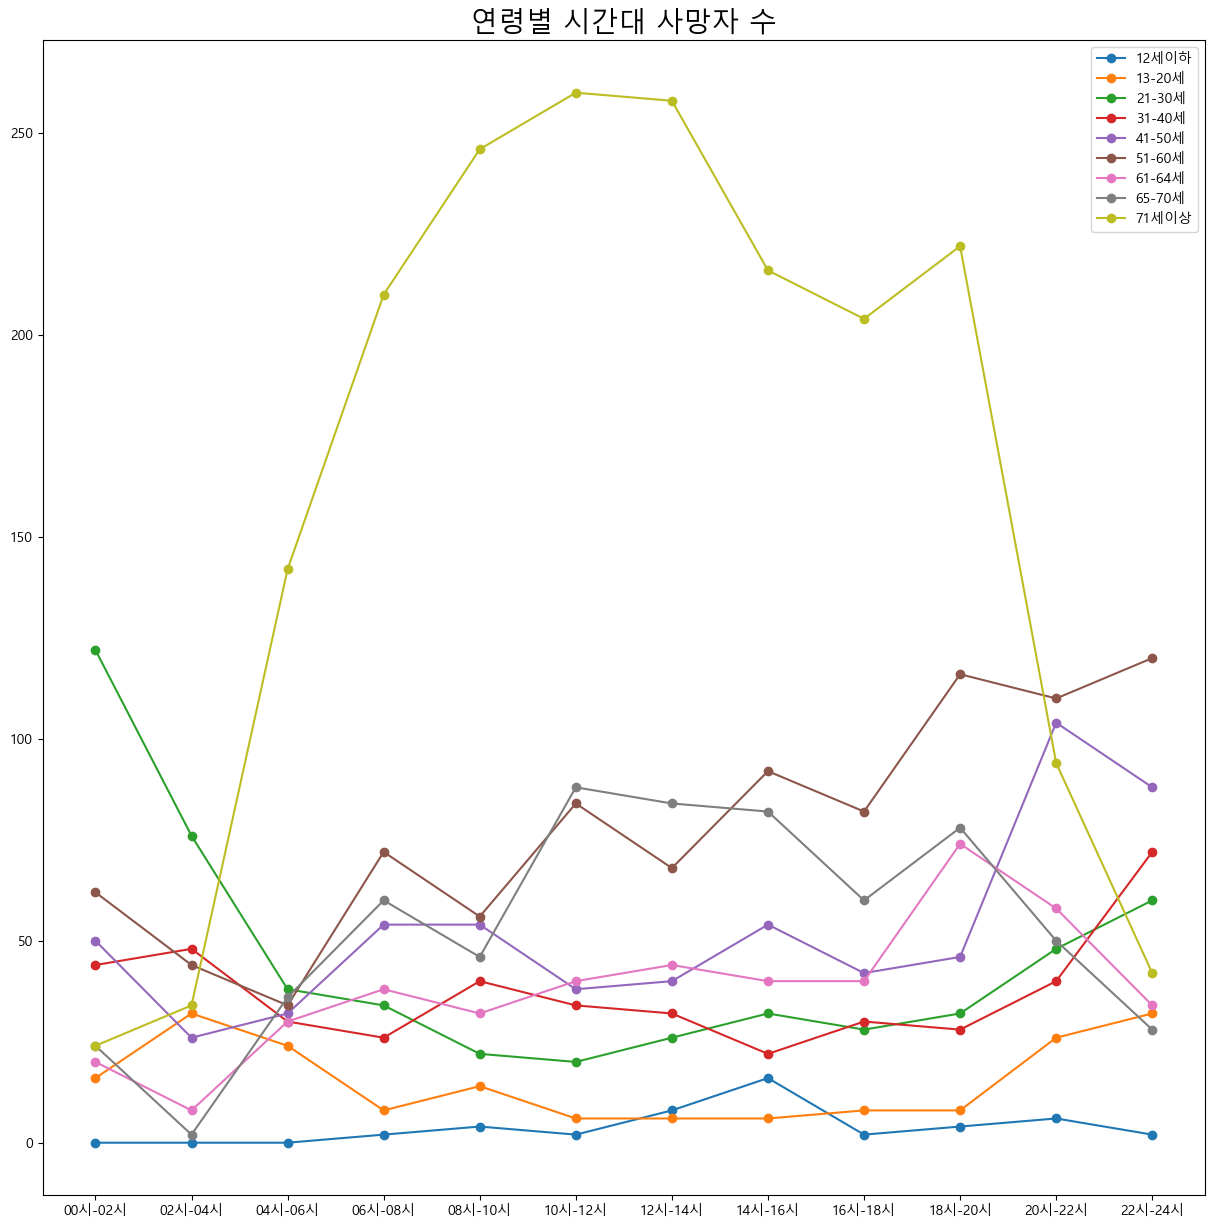

In [10]:
plt.rc('font', family = 'Malgun Gothic')
a = df_group.loc['12세이하']['사망자수']
b = df_group.loc['13-20세']['사망자수']
c = df_group.loc['21-30세']['사망자수']
d = df_group.loc['31-40세']['사망자수']
e = df_group.loc['41-50세']['사망자수']
f = df_group.loc['51-60세']['사망자수']
g = df_group.loc['61-64세']['사망자수']
h = df_group.loc['65-70세']['사망자수']
i = df_group.loc['71세이상']['사망자수']

 
fig = plt.figure(figsize=(15,15)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df_time,a,marker='o',label='12세이하') ## 선그래프 생성
ax.plot(df_time,b,marker='o',label='13-20세') 
ax.plot(df_time,c,marker='o',label='21-30세') 
ax.plot(df_time,d,marker='o',label='31-40세')
ax.plot(df_time,e,marker='o',label='41-50세')
ax.plot(df_time,f,marker='o',label='51-60세')
ax.plot(df_time,g,marker='o',label='61-64세')
ax.plot(df_time,h,marker='o',label='65-70세')
ax.plot(df_time,i,marker='o',label='71세이상')
 
ax.legend() ## 범례
 
plt.title('연령별 시간대 사망자 수',fontsize=20) ## 타이틀 설정
plt.show()

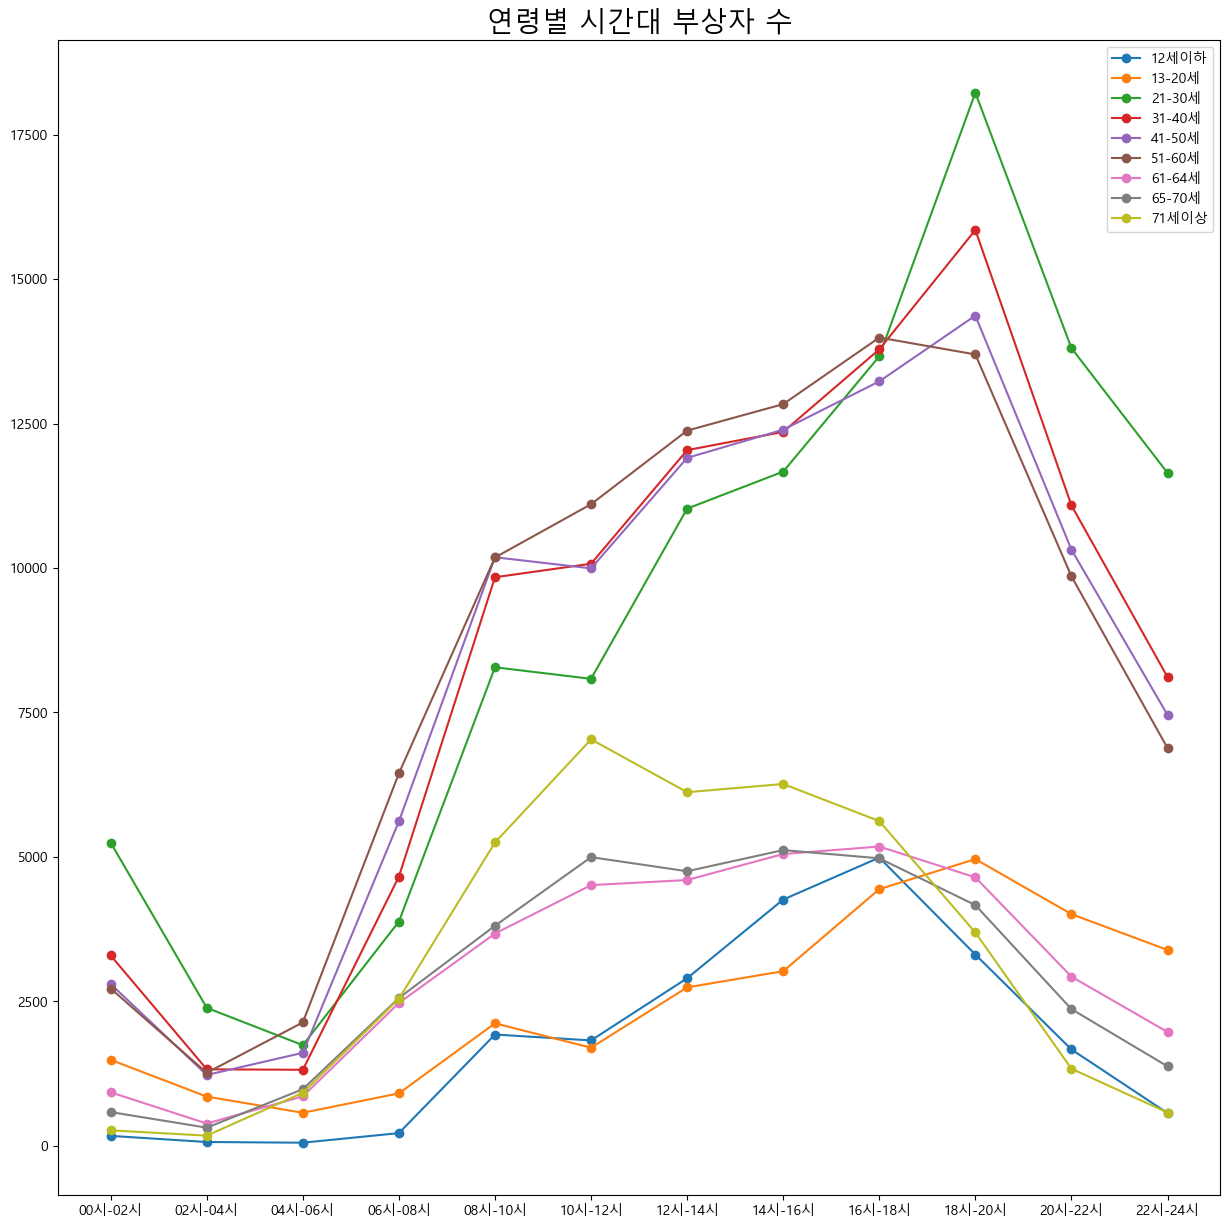

In [11]:
plt.rc('font', family = 'Malgun Gothic')
a = df_group.loc['12세이하']['부상자수']
b = df_group.loc['13-20세']['부상자수']
c = df_group.loc['21-30세']['부상자수']
d = df_group.loc['31-40세']['부상자수']
e = df_group.loc['41-50세']['부상자수']
f = df_group.loc['51-60세']['부상자수']
g = df_group.loc['61-64세']['부상자수']
h = df_group.loc['65-70세']['부상자수']
i = df_group.loc['71세이상']['부상자수']

 
fig = plt.figure(figsize=(15,15)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df_time,a,marker='o',label='12세이하') ## 선그래프 생성
ax.plot(df_time,b,marker='o',label='13-20세') 
ax.plot(df_time,c,marker='o',label='21-30세') 
ax.plot(df_time,d,marker='o',label='31-40세')
ax.plot(df_time,e,marker='o',label='41-50세')
ax.plot(df_time,f,marker='o',label='51-60세')
ax.plot(df_time,g,marker='o',label='61-64세')
ax.plot(df_time,h,marker='o',label='65-70세')
ax.plot(df_time,i,marker='o',label='71세이상')
 
ax.legend() ## 범례
 
plt.title('연령별 시간대 부상자 수',fontsize=20) ## 타이틀 설정
plt.show()

In [12]:
df_group2 = df.groupby('시간대별').sum()

In [13]:
df_group2

,사망자수,부상자수
시간대별,,
00시-02시,362,17500
02시-04시,270,7996
04시-06시,366,10184
06시-08시,504,29306
08시-10시,514,55268
10시-12시,572,59318
12시-14시,566,68466
14시-16시,560,72968
16시-18시,496,79872


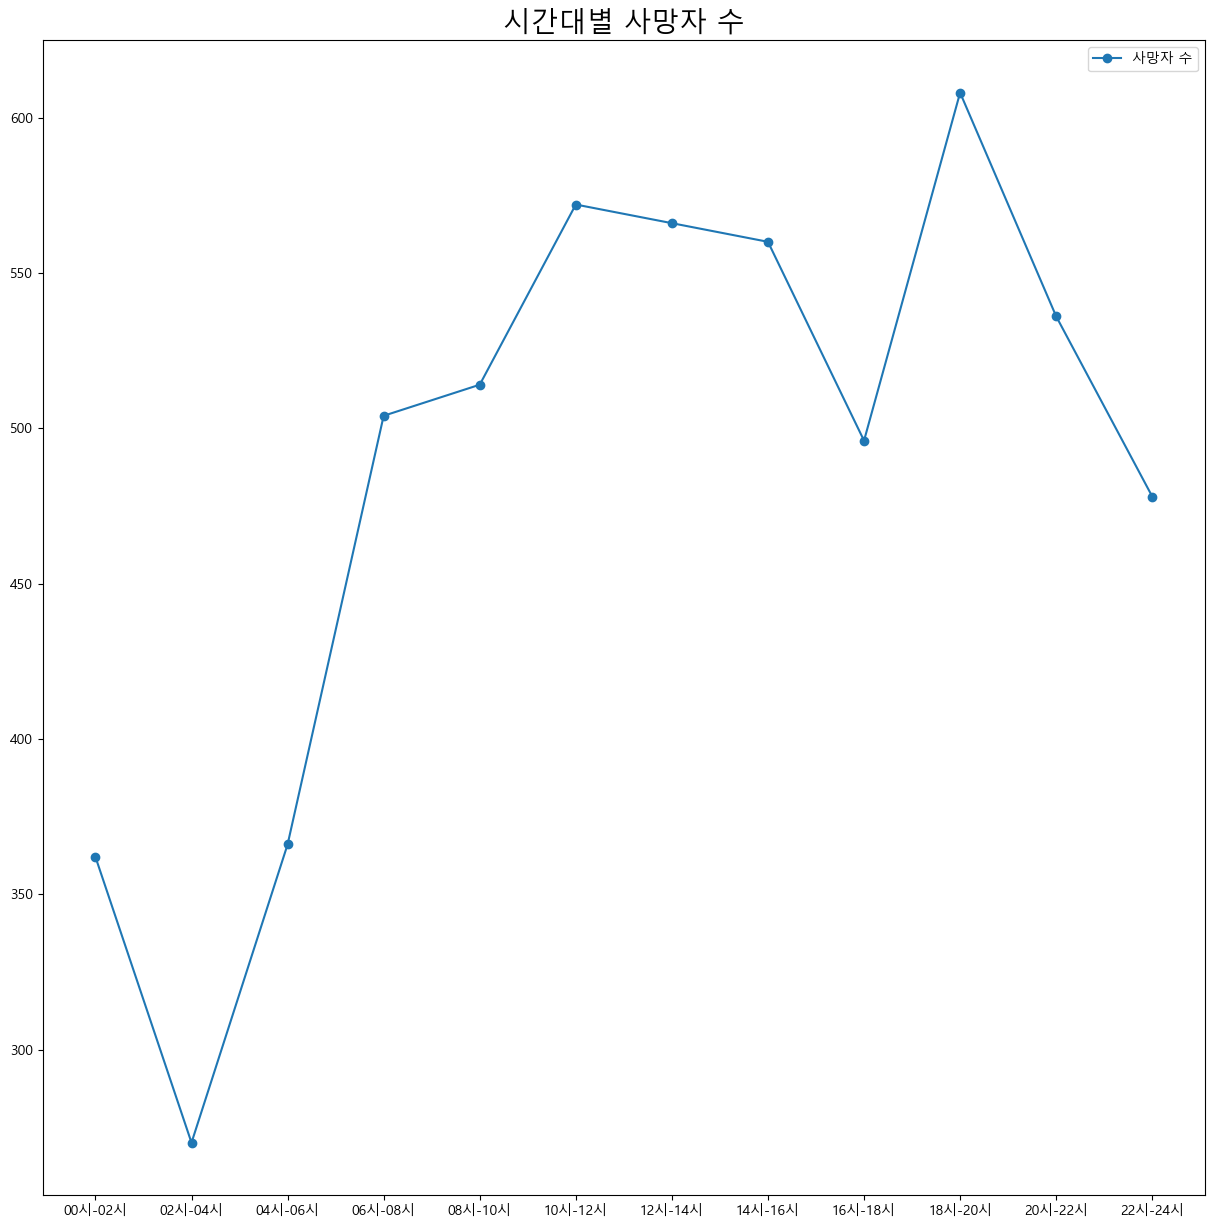

In [14]:
plt.rc('font', family = 'Malgun Gothic')

a = df_group2['사망자수']
b = df_group2['부상자수']
 
fig = plt.figure(figsize=(15,15)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df_time,a,marker='o',label = '사망자 수')## 선그래프 생성

 
ax.legend() ## 범례
 
plt.title('시간대별 사망자 수',fontsize=20) ## 타이틀 설정
plt.show()

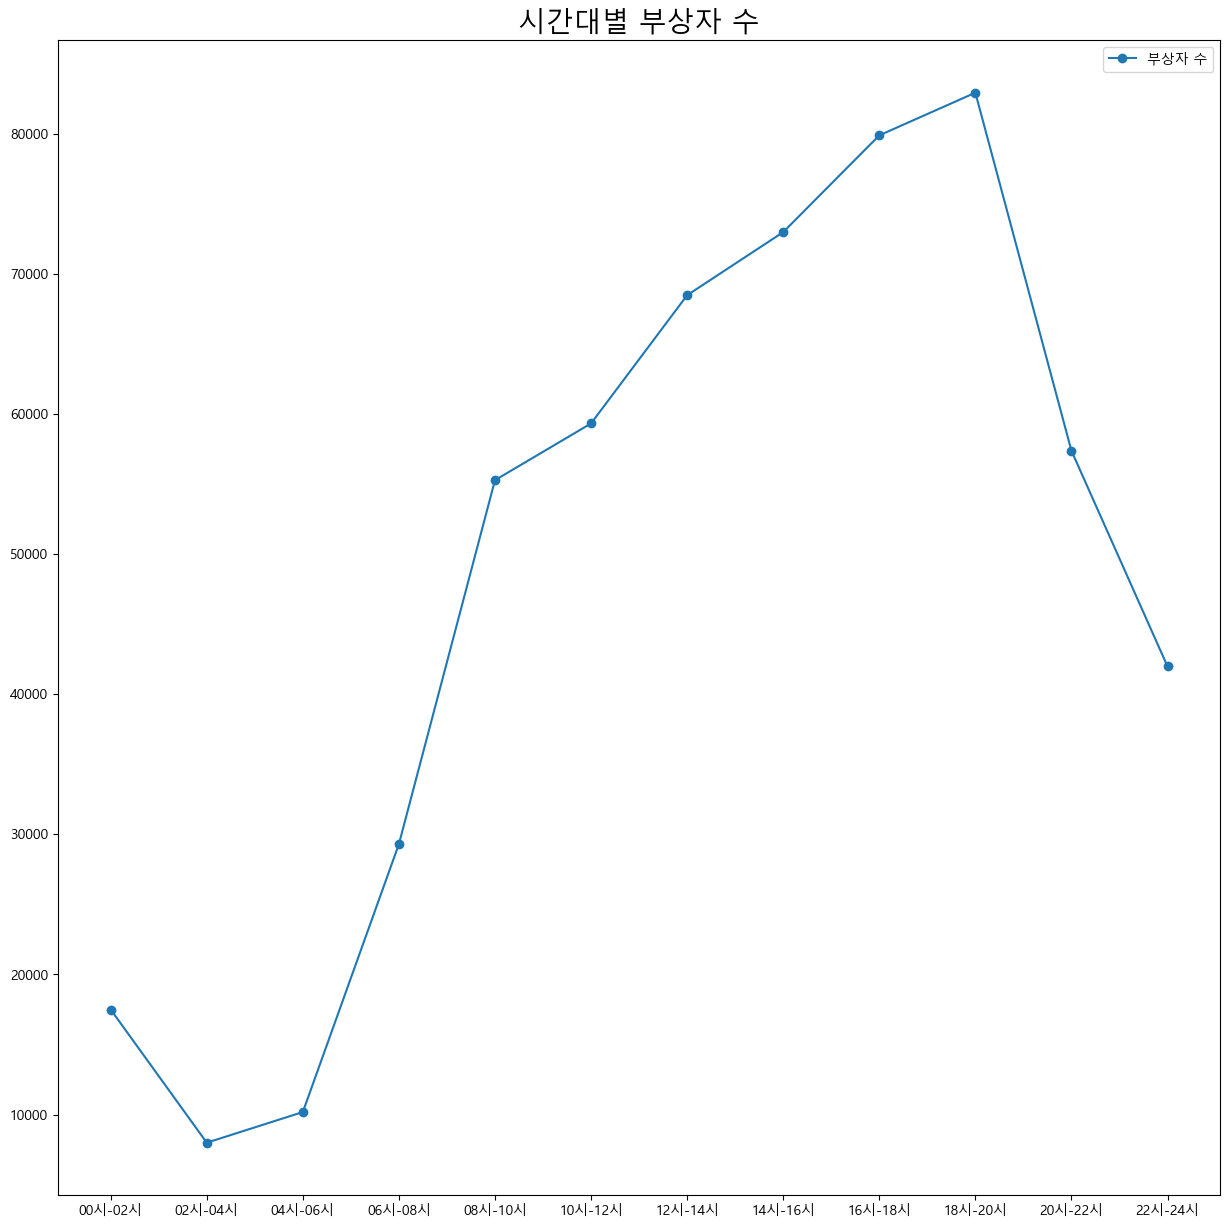

In [15]:
plt.rc('font', family = 'Malgun Gothic')

a = df_group2['사망자수']
b = df_group2['부상자수']
 
fig = plt.figure(figsize=(15,15)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df_time,b,marker='o',label = '부상자 수')## 선그래프 생성

 
ax.legend() ## 범례
 
plt.title('시간대별 부상자 수',fontsize=20) ## 타이틀 설정
plt.show()